In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fci_Stock_Position_commodity_02_Rice-Raw_Odisha-2017.csv")

# Display the first few rows of the DataFrame
df.head()


,Date,Code,CommodityId,CommodityName,DistrictName,DistrictCode,Stock,CommodityStock,TotalStock
0,2017-01-01T00:00:00Z,Region Name: Orissa,2,Rice-Raw,BALASORE,EE12,629.1178,211511.7142,211511.7142
1,2017-01-01T00:00:00Z,Region Name: Orissa,2,Rice-Raw,BEHRAMPUR,EE13,57606.9892,211511.7142,211511.7142
2,2017-01-01T00:00:00Z,Region Name: Orissa,2,Rice-Raw,JAYPORE,EE15,91158.6868,211511.7142,211511.7142
3,2017-01-01T00:00:00Z,Region Name: Orissa,2,Rice-Raw,SAMBALPUR,EE16,48575.2034,211511.7142,211511.7142
4,2017-01-01T00:00:00Z,Region Name: Orissa,2,Rice-Raw,TITLAGARH,EE17,13541.7170,211511.7142,211511.7142


In [ ]:
print(df.info)

<bound method DataFrame.info of                       Date                 Code  CommodityId CommodityName  \
0     2017-01-01T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
1     2017-01-01T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
2     2017-01-01T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
3     2017-01-01T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
4     2017-01-01T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
...                    ...                  ...          ...           ...   
1648  2017-12-30T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
1649  2017-12-31T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
1650  2017-12-31T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
1651  2017-12-31T00:00:00Z  Region Name: Orissa            2      Rice-Raw   
1652  2017-12-31T00:00:00Z  Region Name: Orissa            2      Rice-Raw   

     DistrictName DistrictCode 

In [ ]:
# Check the column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1653 non-null   object 
 1   Code            1653 non-null   object 
 2   CommodityId     1653 non-null   int64  
 3   CommodityName   1653 non-null   object 
 4   DistrictName    1653 non-null   object 
 5   DistrictCode    1653 non-null   object 
 6   Stock           1653 non-null   float64
 7   CommodityStock  1653 non-null   float64
 8   TotalStock      1653 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 116.4+ KB
None


In [ ]:
# Check the summary statistics of numerical columns
print(df.describe())

       CommodityId          Stock  CommodityStock     TotalStock
count       1653.0    1653.000000     1653.000000    1653.000000
mean           2.0  101650.510943   472444.495461  472444.495461
std            0.0   88559.761766   212106.833638  212106.833638
min            2.0     304.153050   161024.786290  161024.786290
25%            2.0   34389.340800   289401.088470  289401.088470
50%            2.0   90806.858800   474727.515240  474727.515240
75%            2.0  131447.769000   667532.337300  667532.337300
max            2.0  372235.613540   832326.346900  832326.346900


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date              0
Code              0
CommodityId       0
CommodityName     0
DistrictName      0
DistrictCode      0
Stock             0
CommodityStock    0
TotalStock        0
dtype: int64


In [ ]:
df.dtypes

Date               object
Code               object
CommodityId         int64
CommodityName      object
DistrictName       object
DistrictCode       object
Stock             float64
CommodityStock    float64
TotalStock        float64
dtype: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


# Assuming df is already loaded and processed

# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Code', 'CommodityId', 'DistrictCode'], axis=1, inplace=True)
df.dropna(inplace=True)




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=['CommodityName', 'DistrictName'], drop_first=True)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df_encoded.describe())



Descriptive Statistics:
               Stock  CommodityStock     TotalStock  DistrictName_BEHRAMPUR  \
count    1653.000000     1653.000000    1653.000000             1653.000000   
mean   101650.510943   472444.495461  472444.495461                0.220811   
std     88559.761766   212106.833638  212106.833638                0.414919   
min       304.153050   161024.786290  161024.786290                0.000000   
25%     34389.340800   289401.088470  289401.088470                0.000000   
50%     90806.858800   474727.515240  474727.515240                0.000000   
75%    131447.769000   667532.337300  667532.337300                0.000000   
max    372235.613540   832326.346900  832326.346900                1.000000   

       DistrictName_JAYPORE  DistrictName_SAMBALPUR  DistrictName_TITLAGARH  
count           1653.000000             1653.000000             1653.000000  
mean               0.220811                0.220811                0.220811  
std                0.414919   

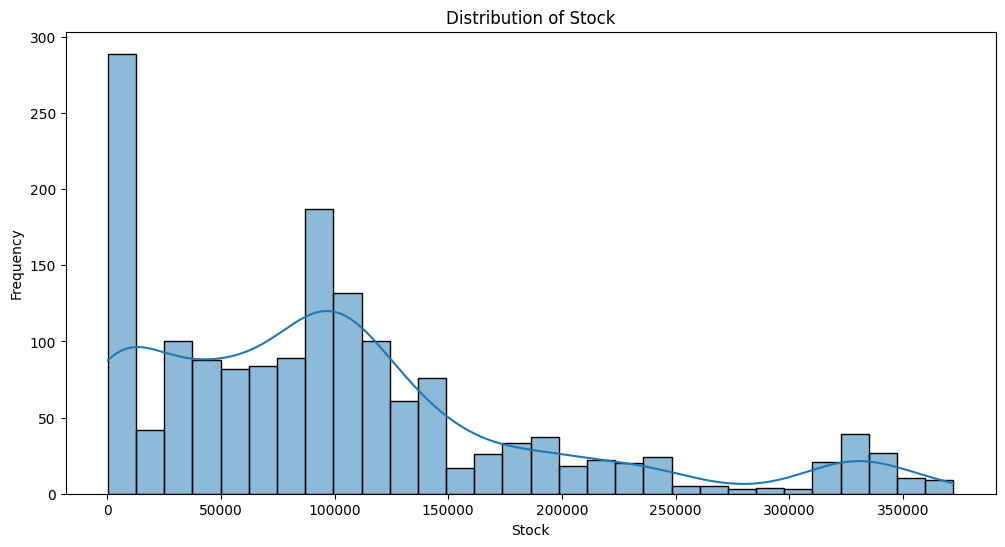

In [ ]:
# Distribution of Stock
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['Stock'], bins=30, kde=True)
plt.title('Distribution of Stock')
plt.xlabel('Stock')
plt.ylabel('Frequency')
plt.show()

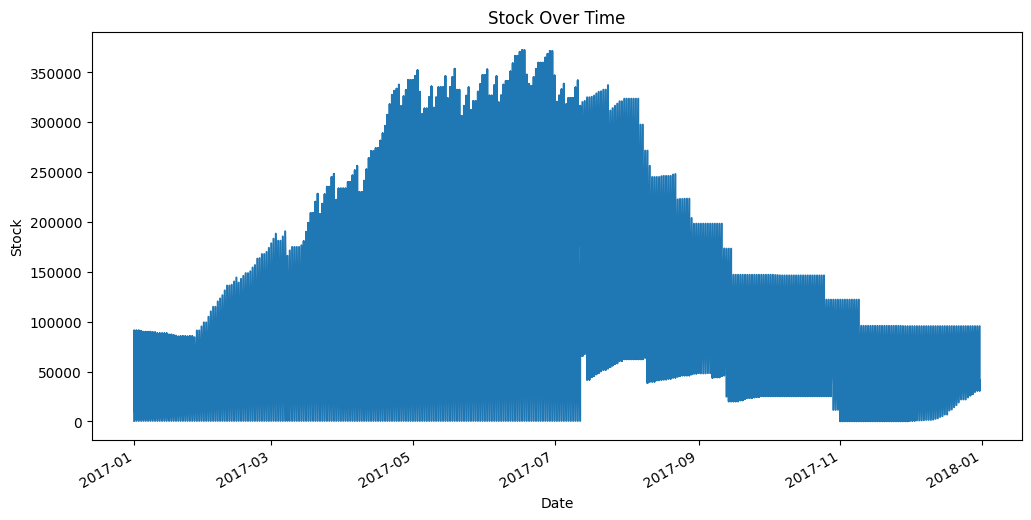

In [ ]:
# Time Series Analysis
time_series_df = df_encoded.set_index('Date')
plt.figure(figsize=(12, 6))
time_series_df['Stock'].plot(title='Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.show()


<ipython-input-12-4ad12419a32a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


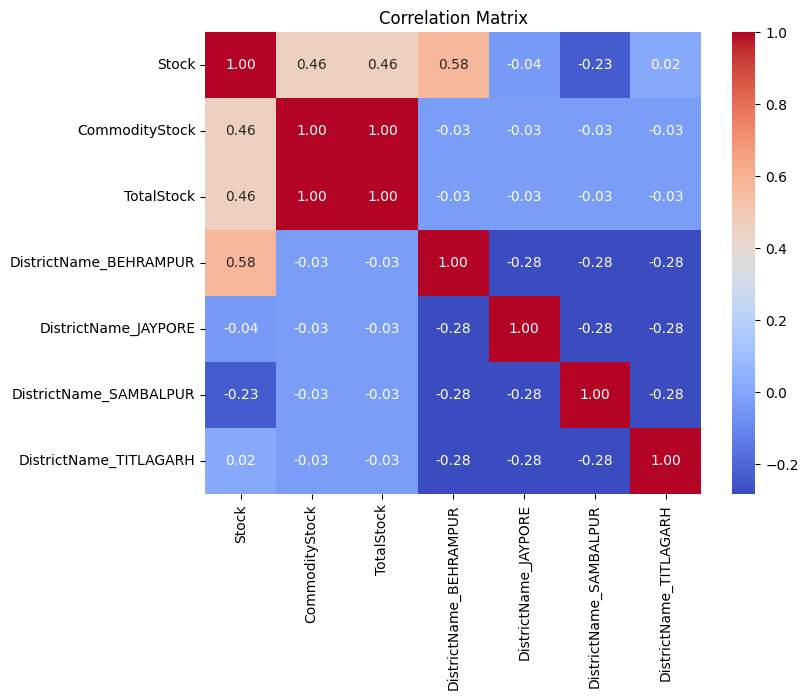

In [ ]:
# Correlation Matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df_encoded.columns)


Index(['Date', 'Stock', 'CommodityStock', 'TotalStock',
       'DistrictName_BEHRAMPUR', 'DistrictName_JAYPORE',
       'DistrictName_SAMBALPUR', 'DistrictName_TITLAGARH'],
      dtype='object')


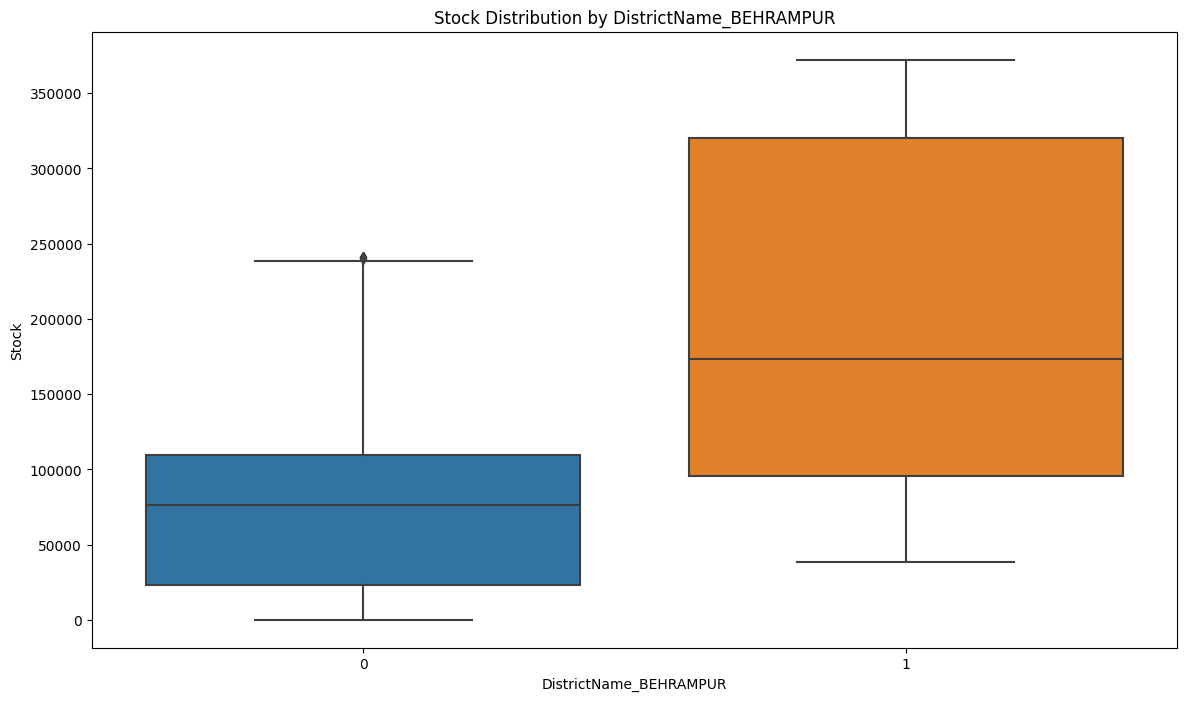

In [ ]:
# Boxplot by DistrictName
plt.figure(figsize=(14, 8))
sns.boxplot(x='DistrictName_BEHRAMPUR', y='Stock', data=df_encoded)
plt.title('Stock Distribution by DistrictName_BEHRAMPUR')
plt.xlabel('DistrictName_BEHRAMPUR')
plt.ylabel('Stock')
plt.show()

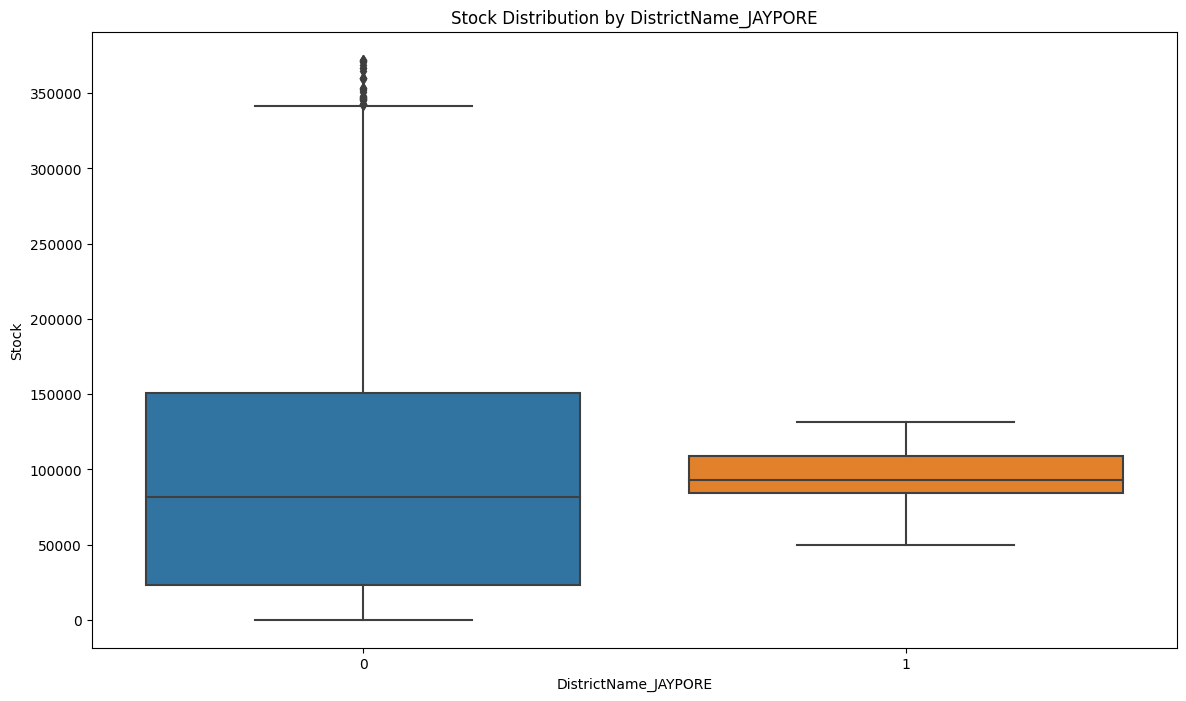

In [ ]:
# Boxplot by DistrictName
plt.figure(figsize=(14, 8))
sns.boxplot(x='DistrictName_JAYPORE', y='Stock', data=df_encoded)
plt.title('Stock Distribution by DistrictName_JAYPORE')
plt.xlabel('DistrictName_JAYPORE')
plt.ylabel('Stock')
plt.show()

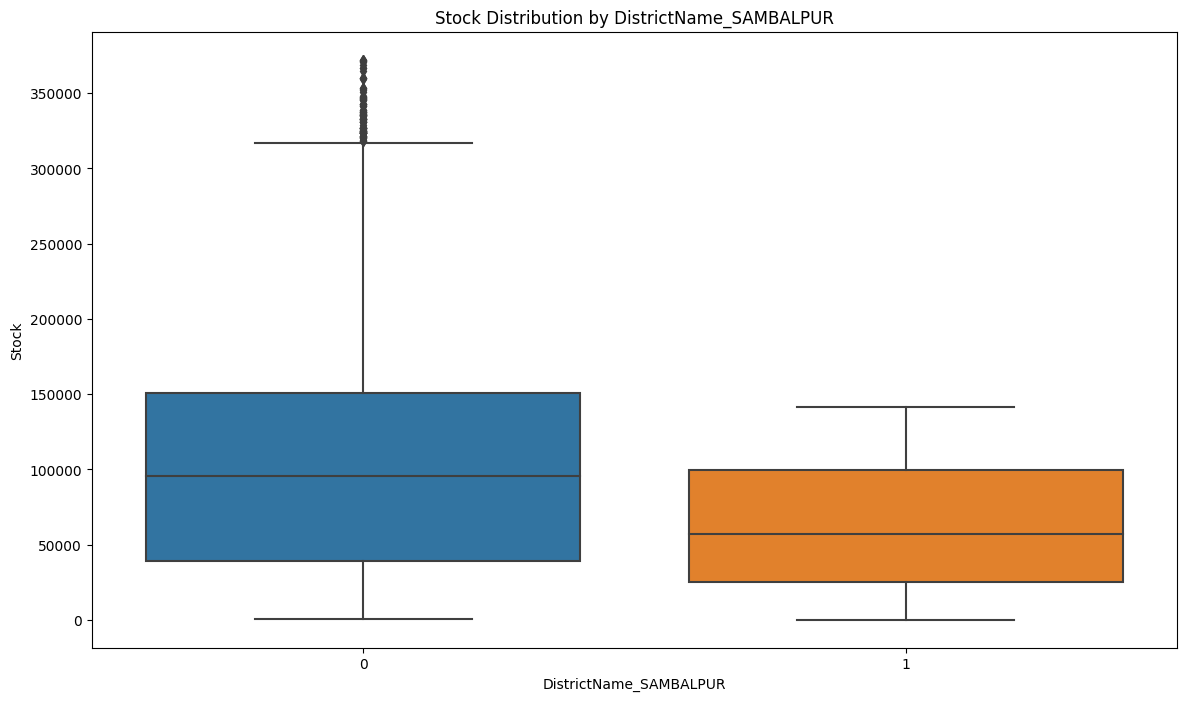

In [ ]:
# Boxplot by DistrictName
plt.figure(figsize=(14, 8))
sns.boxplot(x='DistrictName_SAMBALPUR', y='Stock', data=df_encoded)
plt.title('Stock Distribution by DistrictName_SAMBALPUR')
plt.xlabel('DistrictName_SAMBALPUR')
plt.ylabel('Stock')
plt.show()

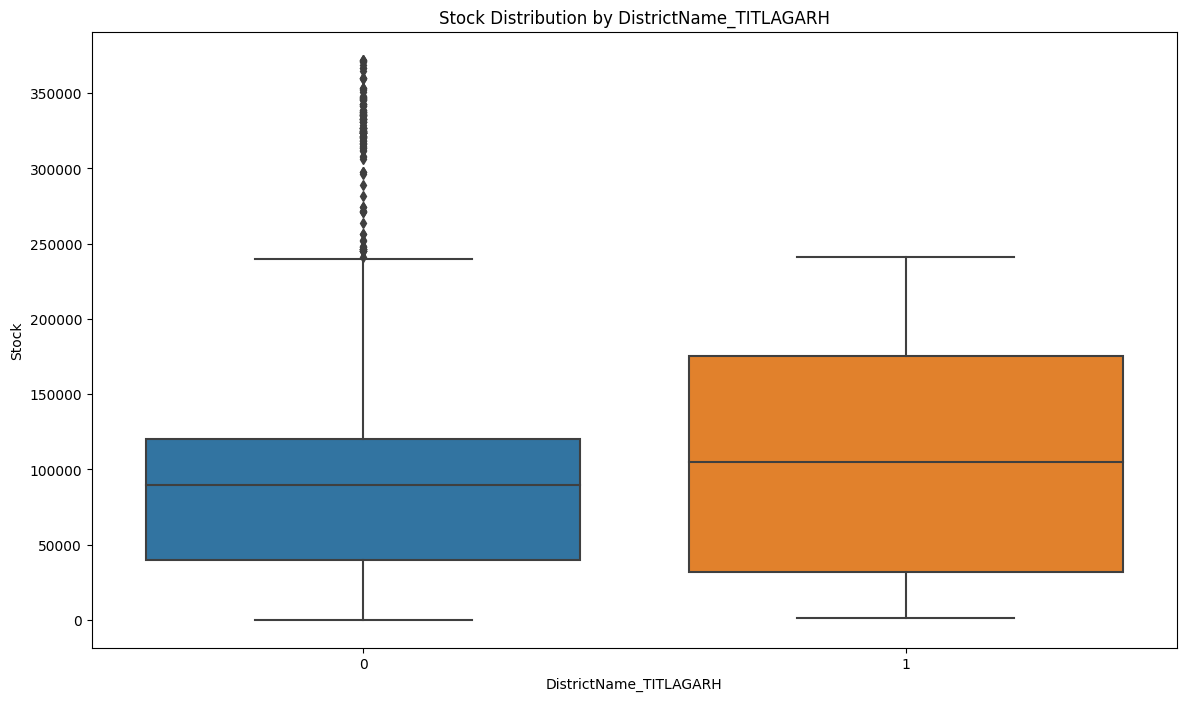

In [ ]:
# Boxplot by DistrictName
plt.figure(figsize=(14, 8))
sns.boxplot(x='DistrictName_TITLAGARH', y='Stock', data=df_encoded)
plt.title('Stock Distribution by DistrictName_TITLAGARH')
plt.xlabel('DistrictName_TITLAGARH')
plt.ylabel('Stock')
plt.show()

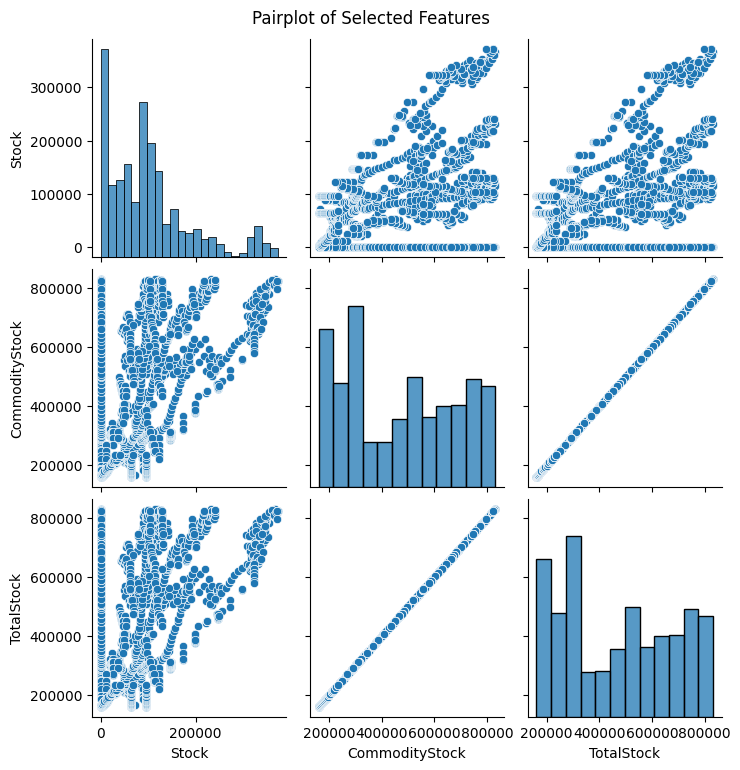

In [ ]:
# Pairplot for selected features
selected_features = ['Stock', 'CommodityStock', 'TotalStock']
sns.pairplot(df_encoded[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

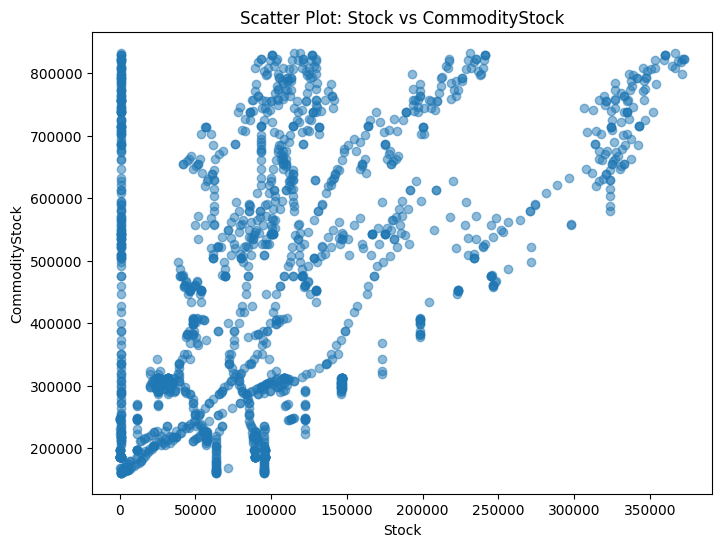

In [ ]:
# Scatter plot for 'Stock' vs 'CommodityStock'
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['Stock'], df_encoded['CommodityStock'], alpha=0.5)
plt.title('Scatter Plot: Stock vs CommodityStock')
plt.xlabel('Stock')
plt.ylabel('CommodityStock')
plt.show()


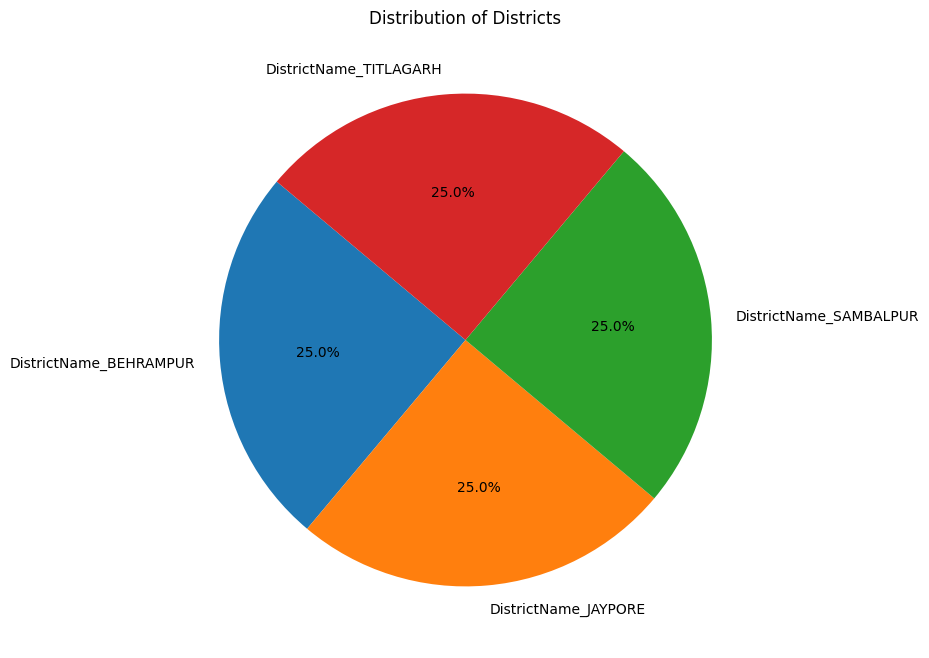

In [ ]:
# Pie chart for the distribution of districts
district_counts = df_encoded[['DistrictName_BEHRAMPUR', 'DistrictName_JAYPORE', 'DistrictName_SAMBALPUR', 'DistrictName_TITLAGARH']].sum()
labels = district_counts.index
sizes = district_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Districts')
plt.show()


In [ ]:
# Feature Engineering
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
df_encoded['Year'] = df_encoded['Date'].dt.year
df_encoded['Month'] = df_encoded['Date'].dt.month
df_encoded['Day'] = df_encoded['Date'].dt.day

# Split the data
X = df_encoded.drop(['Stock', 'Date'], axis=1)
y = df_encoded['Stock']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN Model - MSE: {knn_mse}, R^2: {knn_r2}")

# Modeling and Evaluation for Decision Tree, Random Forest, and Gradient Boosting
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")

KNN Model - MSE: 94515857.42683856, R^2: 0.987985743336297
Decision Tree - MSE: 45234441.57593897, R^2: 0.9942500845262576
Random Forest - MSE: 34426378.205422215, R^2: 0.9956239370300183
Gradient Boosting - MSE: 133664846.0931119, R^2: 0.9830093720609786


In [ ]:
import matplotlib.pyplot as plt

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN Model - MSE: {knn_mse}, R^2: {knn_r2}")

# Modeling and Evaluation for Decision Tree, Random Forest, and Gradient Boosting
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

models_metrics_mse={}
models_metrics_r2={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    models_metrics_mse[model_name]=mse
    models_metrics_r2[model_name]=r2
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")

models_metrics_mse['KNN Model']=knn_mse
models_metrics_r2['KNN Model']=knn_r2

KNN Model - MSE: 94515857.42683856, R^2: 0.987985743336297
Decision Tree - MSE: 43606613.25632393, R^2: 0.9944570037435058
Random Forest - MSE: 37368564.1259718, R^2: 0.9952499450062018
Gradient Boosting - MSE: 133664846.0931118, R^2: 0.9830093720609786


In [ ]:
models_metrics_r2

{'Decision Tree': 0.9944570037435058,
 'Random Forest': 0.9952499450062018,
 'Gradient Boosting': 0.9830093720609786,
 'KNN Model': 0.987985743336297}

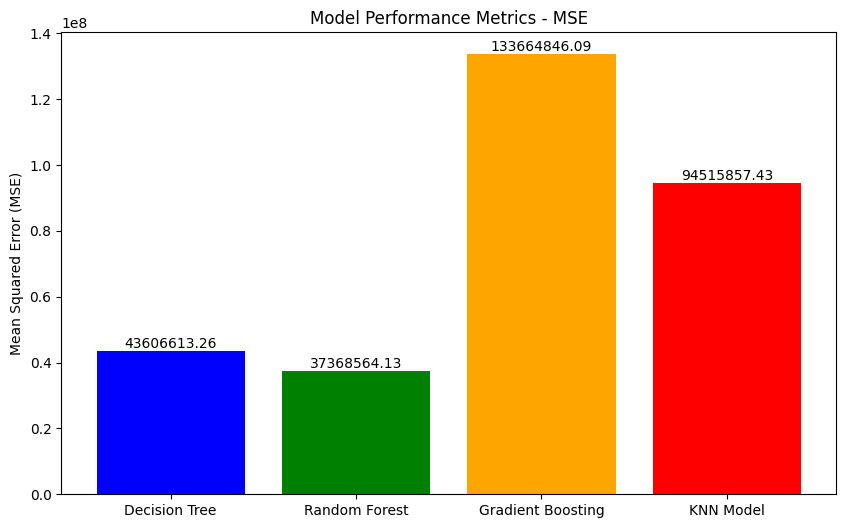

In [ ]:
# Bar plot for MSE
plt.figure(figsize=(10, 6))
bars = plt.bar(models_metrics_mse.keys(), models_metrics_mse.values(), color=['blue', 'green', 'orange', 'red'])

# Annotate values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Metrics - MSE')
plt.show()


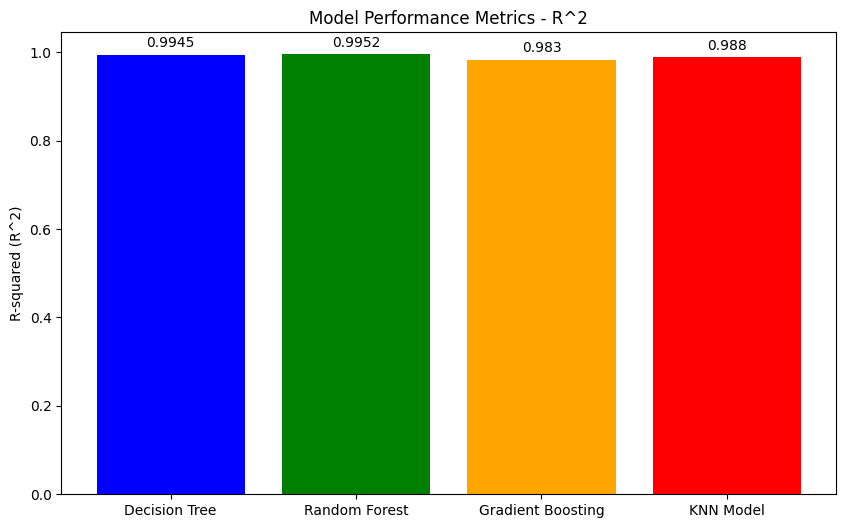

In [ ]:
# Bar plot for R^2
plt.figure(figsize=(10, 6))
bars=plt.bar(models_metrics_r2.keys(), models_metrics_r2.values(), color=['blue', 'green', 'orange', 'red'])

# Annotate values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', color='black')

plt.ylabel('R-squared (R^2)')
plt.title('Model Performance Metrics - R^2')
plt.show()